# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# DATA PREPROCESSING

In [2]:
data=pd.read_csv('dataset.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,05-01-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,08-03-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.shape

(1000, 17)

In [4]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
data.isna().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
print(data['Date'].head())

0    05-01-2019
1    08-03-2019
2    03-03-2019
3    27-01-2019
4    08-02-2019
Name: Date, dtype: object


In [9]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date'].head()

,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03
3,2019-01-27
4,2019-02-08


In [10]:
print(data.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


# DATA VISUALIZATION

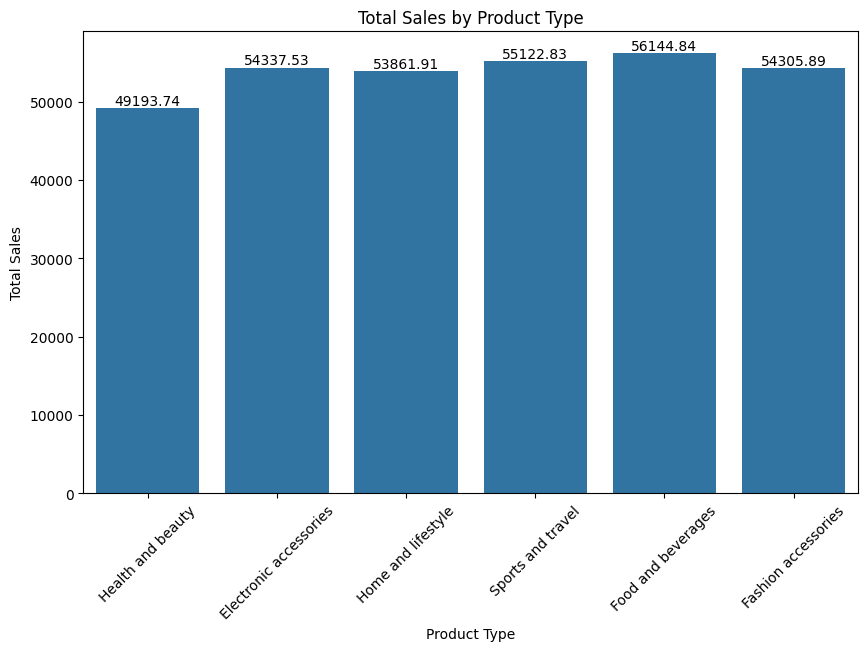

In [11]:
# Total Sales by Product Type

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Product line', y='Total', estimator=sum, errorbar=None)
plt.title('Total Sales by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f')
plt.show()

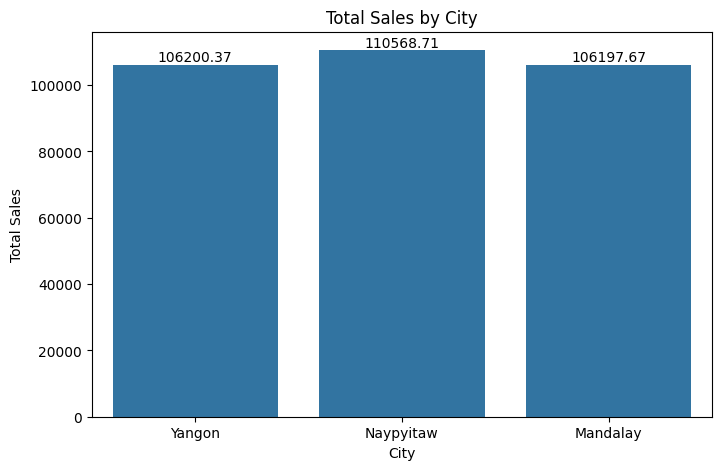

In [12]:
# Total Sales by City

plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=data, x='City', y='Total', estimator=sum, errorbar=None)
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f')
plt.show()

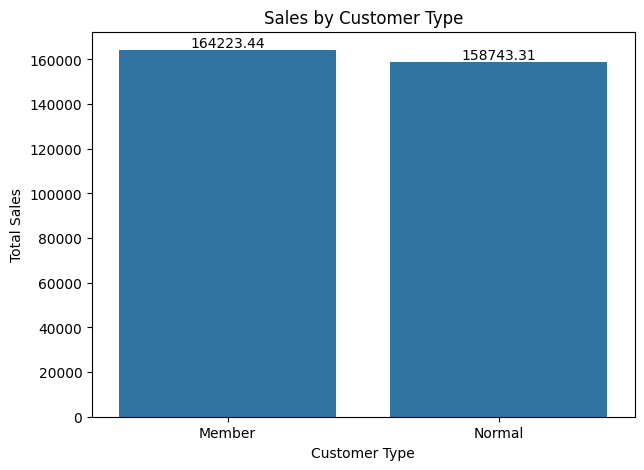

In [13]:
# Total Sales by Customer Type

plt.figure(figsize=(7, 5))
barplot = sns.barplot(data=data, x='Customer type', y='Total', estimator=sum, errorbar=None)
plt.title('Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f')
plt.show()

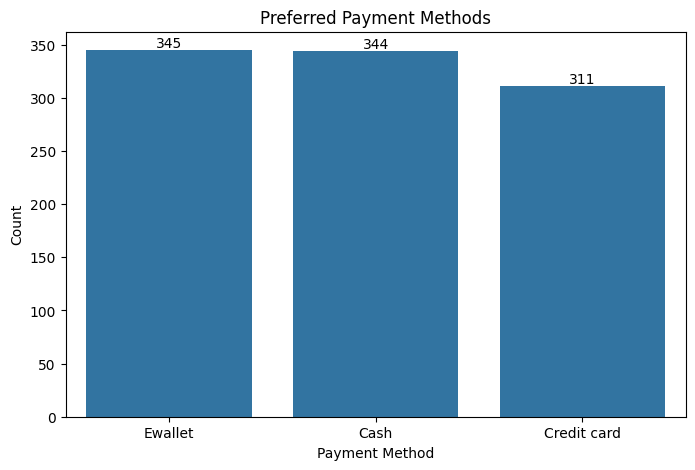

In [14]:
# Preferred Payment Methods

plt.figure(figsize=(8, 5))
countplot = sns.countplot(data=data, x='Payment', order=data['Payment'].value_counts().index)
plt.title('Preferred Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')

for container in countplot.containers:
    countplot.bar_label(container)
plt.show()

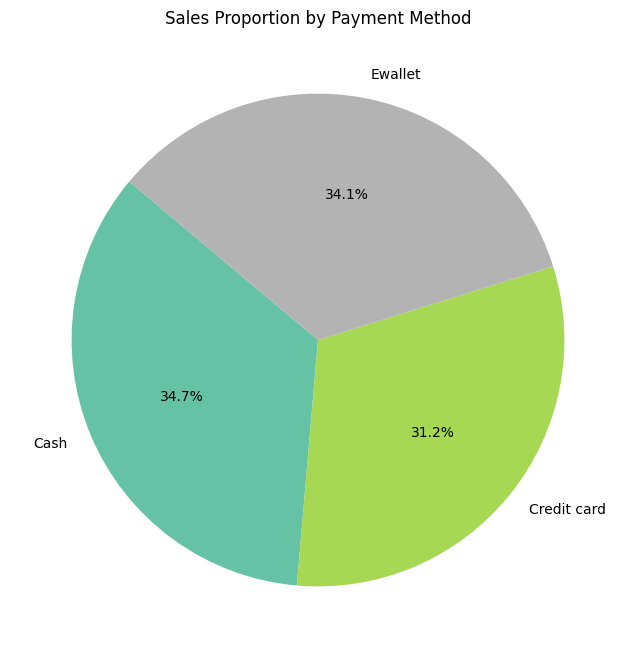

In [15]:
# Proportion of Payment Method by Sales

payment_sales = data.groupby('Payment')['Total'].sum()

plt.figure(figsize=(8, 8))
payment_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set2')
plt.title('Sales Proportion by Payment Method')
plt.ylabel('')
plt.show()

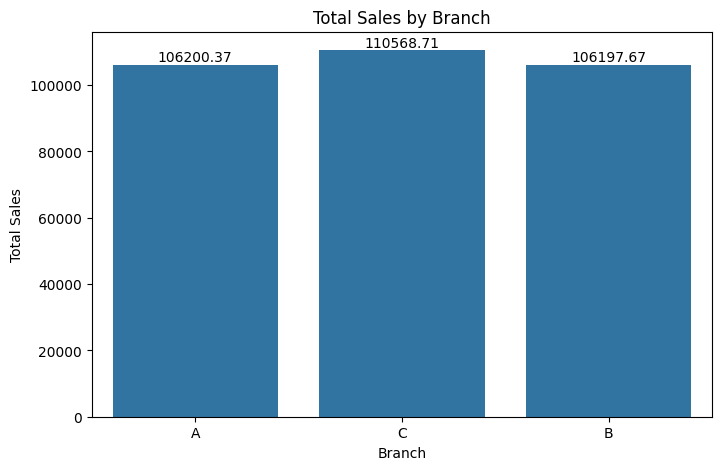

In [16]:
# Total Sales by Branch

plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=data, x='Branch', y='Total', estimator=sum, errorbar=None)
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f')
plt.show()

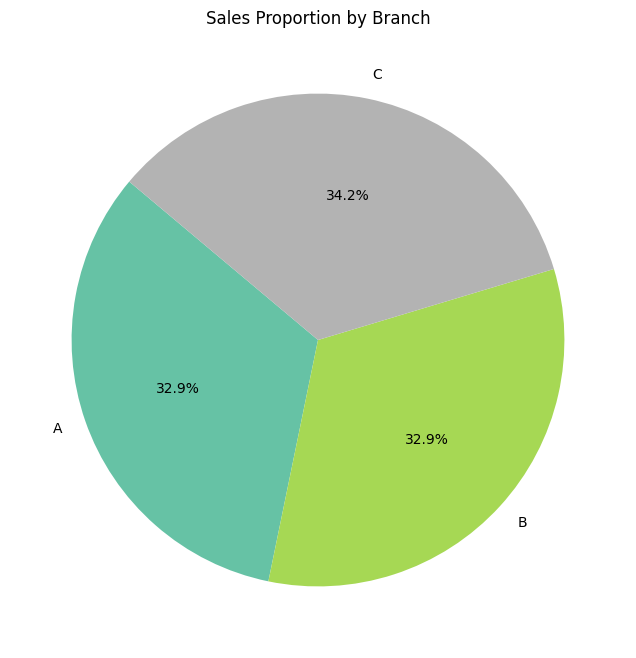

In [17]:
# Proportion of Branch by Sales

payment_sales = data.groupby('Branch')['Total'].sum()

plt.figure(figsize=(8, 8))
payment_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set2')
plt.title('Sales Proportion by Branch')
plt.ylabel('')
plt.show()

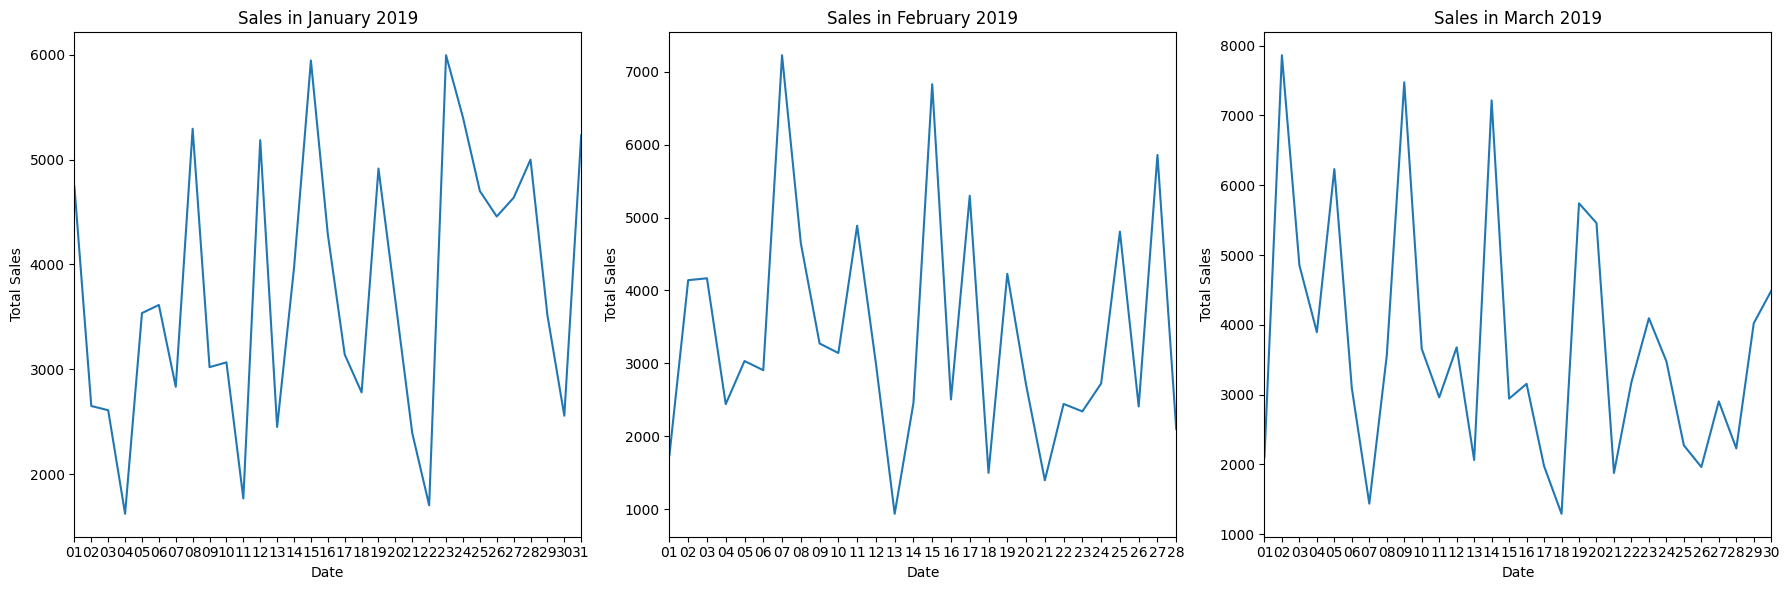

In [18]:
# Total Sales by Month

import matplotlib.dates as mdates
data['Date'] = pd.to_datetime(data['Date'])
sales_over_time = data.groupby('Date')['Total'].sum()

january_sales = sales_over_time[(sales_over_time.index >= '2019-01-01') & (sales_over_time.index < '2019-02-01')]
february_sales = sales_over_time[(sales_over_time.index >= '2019-02-01') & (sales_over_time.index < '2019-03-01')]
march_sales = sales_over_time[(sales_over_time.index >= '2019-03-01') & (sales_over_time.index < '2019-04-01')]
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
january_sales.plot()
plt.title('Sales in January 2019')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))

plt.subplot(1, 3, 2)
february_sales.plot()
plt.title('Sales in February 2019')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))

plt.subplot(1, 3, 3)
march_sales.plot()
plt.title('Sales in March 2019')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))

plt.tight_layout()
plt.show()

<ipython-input-19-41d25e13f4dd>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Time']).dt.hour


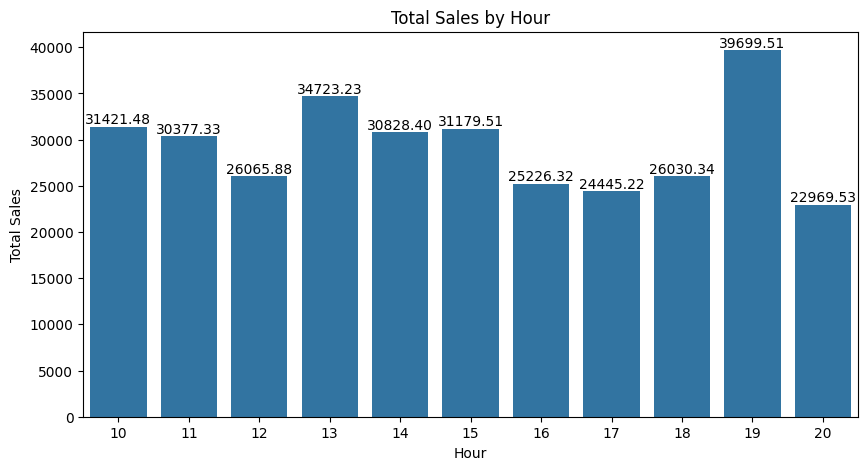

In [19]:
# Total Sales by Hour

data['Hour'] = pd.to_datetime(data['Time']).dt.hour
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=data, x='Hour', y='Total', estimator=sum, errorbar=None)
plt.title('Total Sales by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Sales')

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f')
plt.show()

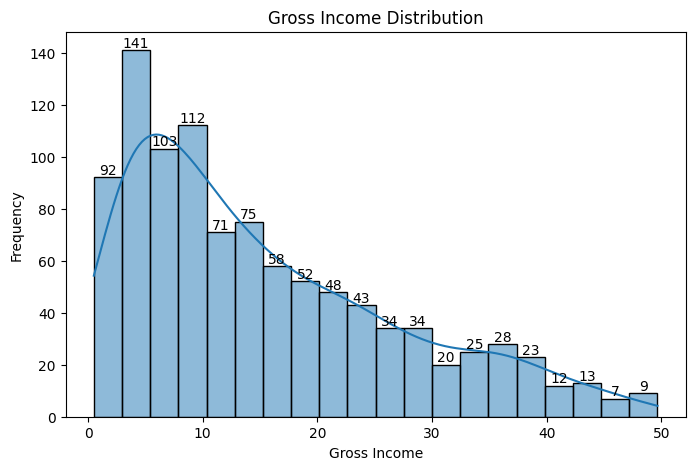

In [20]:
# Gross Income Distribution

plt.figure(figsize=(8, 5))
histplot = sns.histplot(data['gross income'], kde=True, bins=20)
plt.title('Gross Income Distribution')
plt.xlabel('Gross Income')
plt.ylabel('Frequency')

for container in histplot.containers:
    histplot.bar_label(container, fmt='%d')
plt.show()

<Figure size 1000x500 with 0 Axes>

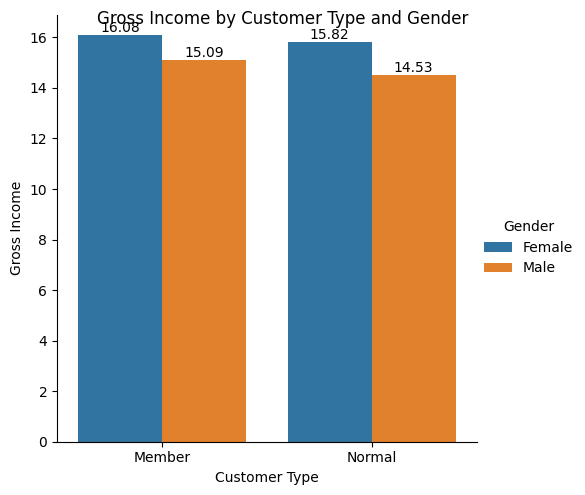

In [21]:
# Gross income by Customer Genter and Type

plt.figure(figsize=(10, 5))
catplot = sns.catplot(data=data, x='Customer type', y='gross income', hue='Gender', kind='bar', errorbar=None)
catplot.fig.suptitle('Gross Income by Customer Type and Gender')
catplot.set_axis_labels('Customer Type', 'Gross Income')

for ax in catplot.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')
plt.show()

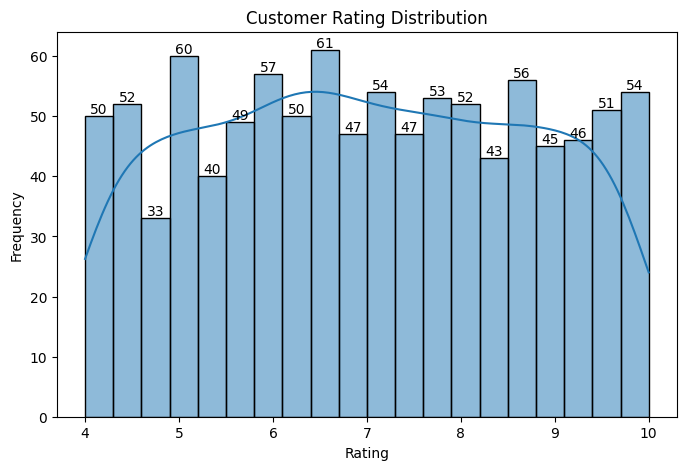

In [22]:
# Product Rating Frequency

plt.figure(figsize=(8, 5))
histplot = sns.histplot(data['Rating'], kde=True, bins=20)
plt.title('Customer Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

for container in histplot.containers:
    histplot.bar_label(container, fmt='%d')
plt.show()

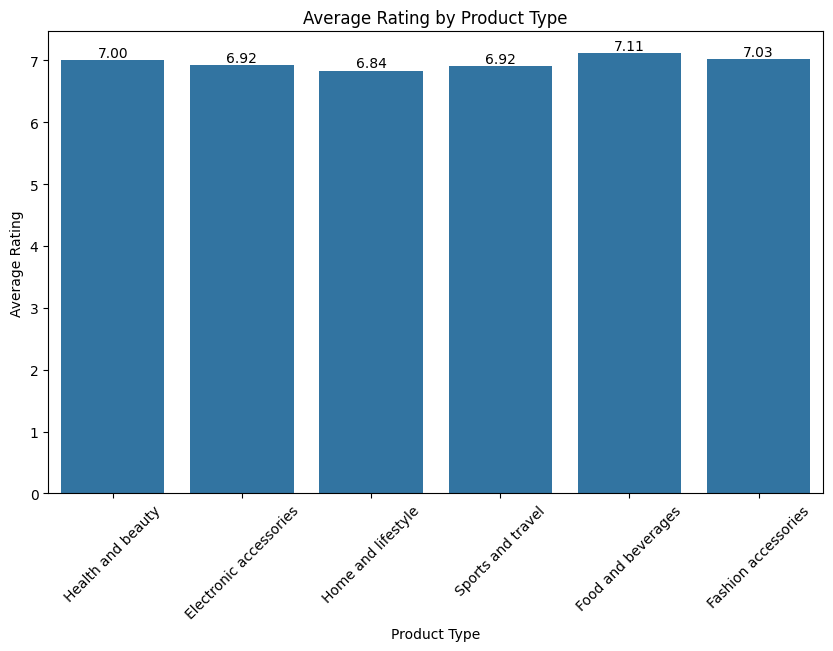

In [23]:
# Average Rating of Products

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=data, x='Product line', y='Rating', estimator='mean', errorbar=None)
plt.title('Average Rating by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f')
plt.show()

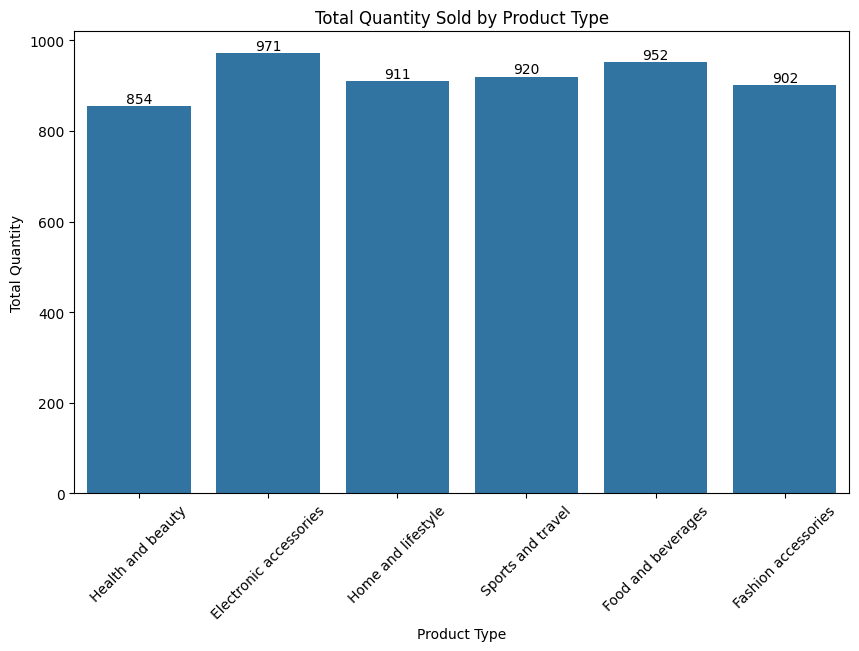

In [24]:
# Total Quantity of Each product Type

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=data, x='Product line', y='Quantity', estimator='sum', errorbar=None)
plt.title('Total Quantity Sold by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Quantity')

for container in barplot.containers:
    barplot.bar_label(container, fmt='%d')
plt.xticks(rotation=45)
plt.show()

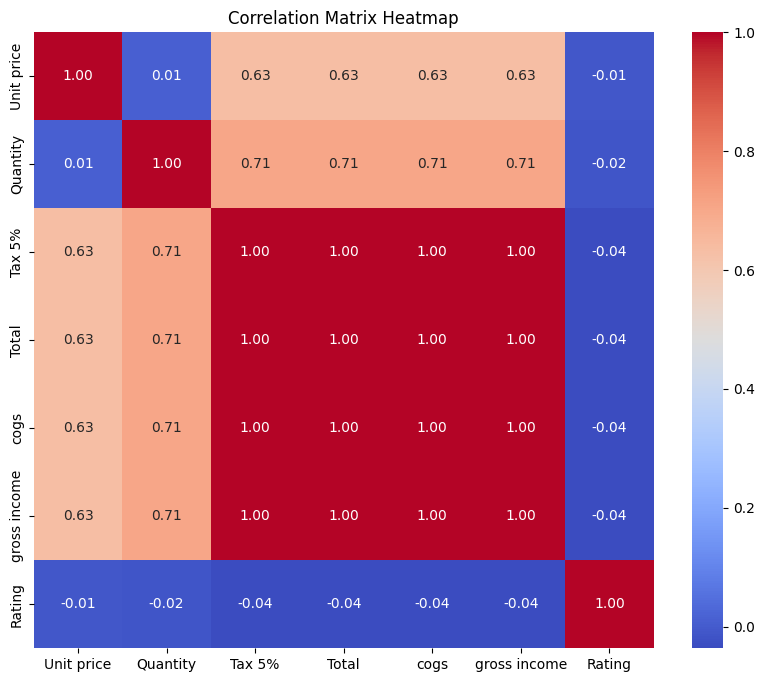

In [25]:
# Correlation Matrix

numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# DATA TRANSFORMTION


In [26]:
# IMPORTING LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

In [27]:
# DATA SPLITTING

X = data.drop(columns=['Total'])
y = data['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (800, 17)
Testing Features Shape: (200, 17)
Training Target Shape: (800,)
Testing Target Shape: (200,)


In [28]:
# DATA NORMALIZATION

numerical_coln = ['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train[numerical_coln])
X_test_minmax = min_max_scaler.transform(X_test[numerical_coln])

z_score_scaler = StandardScaler()
X_train_zscore = z_score_scaler.fit_transform(X_train[numerical_coln])
X_test_zscore = z_score_scaler.transform(X_test[numerical_coln])

decimal_scaler = MaxAbsScaler()
X_train_decimal_scaled = decimal_scaler.fit_transform(X_train[numerical_coln])
X_test_decimal_scaled = decimal_scaler.transform(X_test[numerical_coln])

print("Min-Max Scaled X_train Shape:", X_train_minmax.shape)
print("Min-Max Scaled X_test Shape:", X_test_minmax.shape)
print("Z-Score Scaled X_train Shape:", X_train_zscore.shape)
print("Z-Score Scaled X_test Shape:", X_test_zscore.shape)
print("Decimal Scaled X_train Shape:", X_train_decimal_scaled.shape)
print("Decimal Scaled X_test Shape:", X_test_decimal_scaled.shape)

Min-Max Scaled X_train Shape: (800, 7)
Min-Max Scaled X_test Shape: (200, 7)
Z-Score Scaled X_train Shape: (800, 7)
Z-Score Scaled X_test Shape: (200, 7)
Decimal Scaled X_train Shape: (800, 7)
Decimal Scaled X_test Shape: (200, 7)


In [29]:
min_max_scaler = MinMaxScaler()
y_train_minmax = min_max_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_minmax = min_max_scaler.transform(y_test.values.reshape(-1, 1))

z_score_scaler = StandardScaler()
y_train_zscore = z_score_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_zscore = z_score_scaler.transform(y_test.values.reshape(-1, 1))

decimal_scaler = MaxAbsScaler()
y_train_decimal_scaled = decimal_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_decimal_scaled = decimal_scaler.transform(y_test.values.reshape(-1, 1))

print("Min-Max Scaled y_train Shape:", y_train_minmax.shape)
print("Min-Max Scaled y_test Shape:", y_test_minmax.shape)
print("Z-Score Scaled y_train Shape:", y_train_zscore.shape)
print("Z-Score Scaled y_test Shape:", y_test_zscore.shape)
print("Decimal Scaled y_train Shape:", y_train_decimal_scaled.shape)
print("Decimal Scaled y_test Shape:", y_test_decimal_scaled.shape)

Min-Max Scaled y_train Shape: (800, 1)
Min-Max Scaled y_test Shape: (200, 1)
Z-Score Scaled y_train Shape: (800, 1)
Z-Score Scaled y_test Shape: (200, 1)
Decimal Scaled y_train Shape: (800, 1)
Decimal Scaled y_test Shape: (200, 1)


Mean Absolute Error (MAE): 1.8245849275899673e-13
Mean Squared Error (MSE): 4.637456093139226e-26
R-squared (R²): 1.0


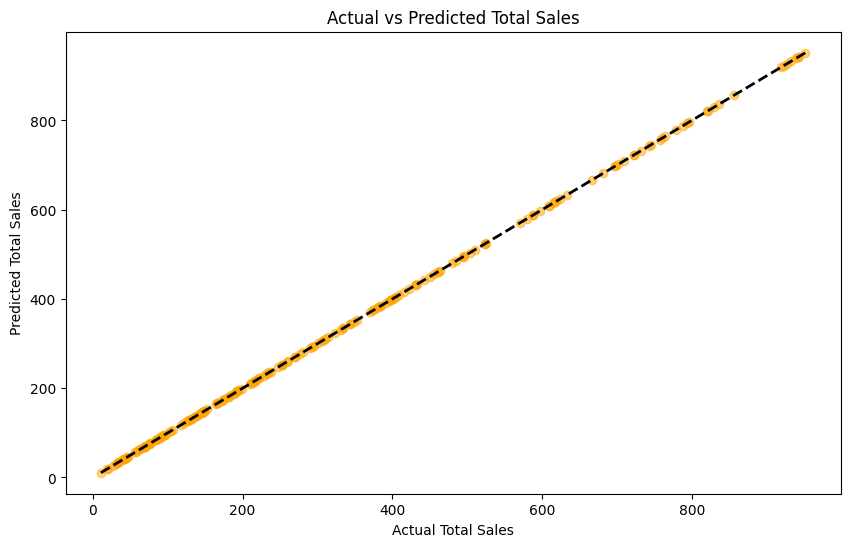

In [30]:
# REGRESSION ANALYSIS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X_columns = ['Unit price', 'Quantity', 'cogs', 'Tax 5%', 'gross income', 'Rating']
X_train_selected = X_train[X_columns]
X_test_selected = X_test[X_columns]

regressor = LinearRegression()
regressor.fit(X_train_selected, y_train)
y_pred_selected = regressor.predict(X_test_selected)

mae_selected = mean_absolute_error(y_test, y_pred_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print("Mean Absolute Error (MAE):", mae_selected)
print("Mean Squared Error (MSE):", mse_selected)
print("R-squared (R²):", r2_selected)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_selected, color='orange', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Total Sales")
plt.ylabel("Predicted Total Sales")
plt.title("Actual vs Predicted Total Sales")
plt.show()